# About

Weather forecasting is rather a statistical measure than a binary decision. We intend to develop an intelligent weather predicting module. This module would considers measures such as maximum temperature, minimum temperature, atmospheric pressure and rainfall for a sampled area and are analysed. An intelligent prediction based on the available data is accomplished using machine learning techniques. The analysis and prediction is based on various algorithm being used to which predicts the next day's weather with good accuracy. The accuracy improve with having more and more datasets of the region. Recent studies have reflected that machine learning techniques achieved better performance than traditional statistical methods. Machine learning, a branch of artificial intelligence has been proved to be a robust method in predicting and analysing a given data set. This module will plays a vital role in agricultural, industrial and logistical fields where the weather forecast is an important criterion.

# Importing Library

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing CSV

In [299]:
df=pd.read_csv('F:\\weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


# Exploratory Data Analysis

In [300]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(5)
memory usage: 63.0+ KB


In [302]:
sns.set(style="ticks")

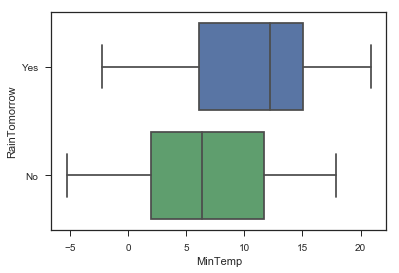

In [303]:
sns.boxplot(x=df['MinTemp'],y=df['RainTomorrow'])

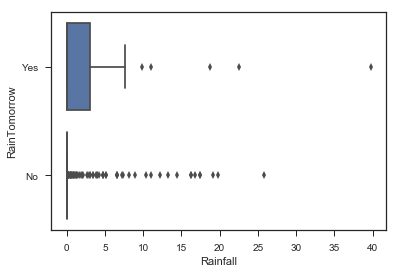

In [304]:
sns.boxplot(x=df['Rainfall'],y=df['RainTomorrow'])

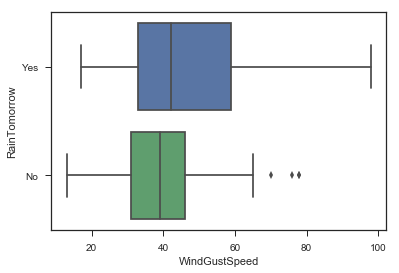

In [305]:
sns.boxplot(x=df['WindGustSpeed'],y=df['RainTomorrow'])

In [306]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


Text(0.5,1,u'Histogram')

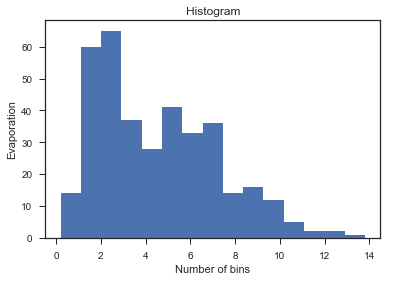

In [307]:
plt.hist(df['Evaporation'],bins=15)
plt.xlabel('Number of bins')
plt.ylabel('Evaporation')
plt.title('Histogram')

In [308]:
df['WindDir9am'].nunique()

16

In [309]:
df['WindDir3pm'].nunique()

16

# Preprocessing

In [310]:
df.columns

Index([u'MinTemp', u'MaxTemp', u'Rainfall', u'Evaporation', u'Sunshine',
       u'WindGustDir', u'WindGustSpeed', u'WindDir9am', u'WindDir3pm',
       u'WindSpeed9am', u'WindSpeed3pm', u'Humidity9am', u'Humidity3pm',
       u'Pressure9am', u'Pressure3pm', u'Cloud9am', u'Cloud3pm', u'Temp9am',
       u'Temp3pm', u'RainToday', u'RISK_MM', u'RainTomorrow'],
      dtype='object')

In [311]:
df['Windspeed']=(df['WindSpeed9am']+df['WindSpeed3pm']/2)
df=df.drop(['WindSpeed9am','WindSpeed3pm'],1)

In [312]:
df['Humidity']=(df['Humidity9am']+df['Humidity3pm']/2)
df=df.drop(['Humidity9am','Humidity3pm'],1)

In [313]:
df['Pressure']=(df['Pressure9am']+df['Pressure3pm']/2)
df=df.drop(['Pressure9am','Pressure3pm'],1)

In [314]:
df['Cloud']=(df['Cloud9am']+df['Cloud3pm']/2)
df=df.drop(['Cloud9am','Cloud3pm'],1)

In [315]:
df['Temp']=(df['Temp9am']+df['Temp3pm']/2)
df=df.drop(['Temp9am','Temp3pm'],1)

In [316]:
df['Temp']=(df['MinTemp']+df['MaxTemp']/2)
df=df.drop(['MinTemp','MaxTemp'],1)

In [317]:
df.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,Windspeed,Humidity,Pressure,Cloud,Temp
0,0.0,3.4,6.3,NW,30.0,SW,NW,No,3.6,Yes,16.0,82.5,1527.20,10.5,20.15
1,3.6,4.4,9.7,ENE,39.0,E,W,Yes,3.6,Yes,12.5,98.0,1516.60,6.5,27.45
2,3.6,5.8,3.3,NW,85.0,N,NNE,Yes,39.8,Yes,9.0,116.5,1513.10,11.5,25.40
3,39.8,7.2,9.1,NW,54.0,WNW,W,Yes,2.8,Yes,42.0,90.0,1509.00,5.5,21.05
4,2.8,5.6,10.6,SSE,50.0,SSE,ESE,Yes,0.0,No,34.0,92.5,1527.55,10.5,15.65


In [318]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()

In [319]:
le.fit(df['RainToday'])
df['RainToday']=le.transform(df['RainToday'])

In [320]:
df['RainToday']=df['RainToday'].astype('category')

In [321]:
le1.fit(df['RainTomorrow'])
df['RainTomorrow']=le1.transform(df['RainTomorrow'])

In [322]:
df['RainTomorrow']=df['RainTomorrow'].astype('category')

In [323]:
df.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,Windspeed,Humidity,Pressure,Cloud,Temp
0,0.0,3.4,6.3,NW,30.0,SW,NW,0,3.6,1,16.0,82.5,1527.20,10.5,20.15
1,3.6,4.4,9.7,ENE,39.0,E,W,1,3.6,1,12.5,98.0,1516.60,6.5,27.45
2,3.6,5.8,3.3,NW,85.0,N,NNE,1,39.8,1,9.0,116.5,1513.10,11.5,25.40
3,39.8,7.2,9.1,NW,54.0,WNW,W,1,2.8,1,42.0,90.0,1509.00,5.5,21.05
4,2.8,5.6,10.6,SSE,50.0,SSE,ESE,1,0.0,0,34.0,92.5,1527.55,10.5,15.65


# Missing Values

In [324]:
df.isnull().sum()

Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
RainToday         0
RISK_MM           0
RainTomorrow      0
Windspeed         7
Humidity          0
Pressure          0
Cloud             0
Temp              0
dtype: int64

In [325]:
df[df['WindDir9am'].isnull()].head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,Windspeed,Humidity,Pressure,Cloud,Temp
113,6.6,3.2,8.6,W,50.0,NaN,W,1,0.0,0,NaN,99.0,1509.45,7.5,27.00
118,0.0,7.8,8.1,W,48.0,NaN,W,0,0.0,0,NaN,86.5,1518.15,5.0,25.50
127,0.0,8.4,7.5,E,50.0,NaN,ENE,0,3.0,1,NaN,73.0,1530.45,3.5,25.40
138,0.0,5.8,10.7,NW,43.0,NaN,WNW,0,0.0,0,9.5,91.0,1532.10,0.5,27.45
140,0.0,5.2,8.0,NW,46.0,NaN,WSW,0,0.0,0,13.0,93.5,1518.50,10.5,26.15


In [326]:
df=df.drop('WindDir9am',1)

In [327]:
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())

In [328]:
df['WindGustDir'].mode()

0    NW
dtype: object

In [329]:
df['WindGustDir']=df['WindGustDir'].fillna('NW')

In [330]:
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

In [331]:
df['WindDir3pm'].mode()

0     NW
1    WNW
dtype: object

In [332]:
df['WindDir3pm']=df['WindDir3pm'].fillna('NW')

In [333]:
df['Windspeed']=df['Windspeed'].fillna(df['Windspeed'].mean())

In [334]:
df.isnull().sum()

Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
RainToday        0
RISK_MM          0
RainTomorrow     0
Windspeed        0
Humidity         0
Pressure         0
Cloud            0
Temp             0
dtype: int64

# Columns VS Columns Visualization

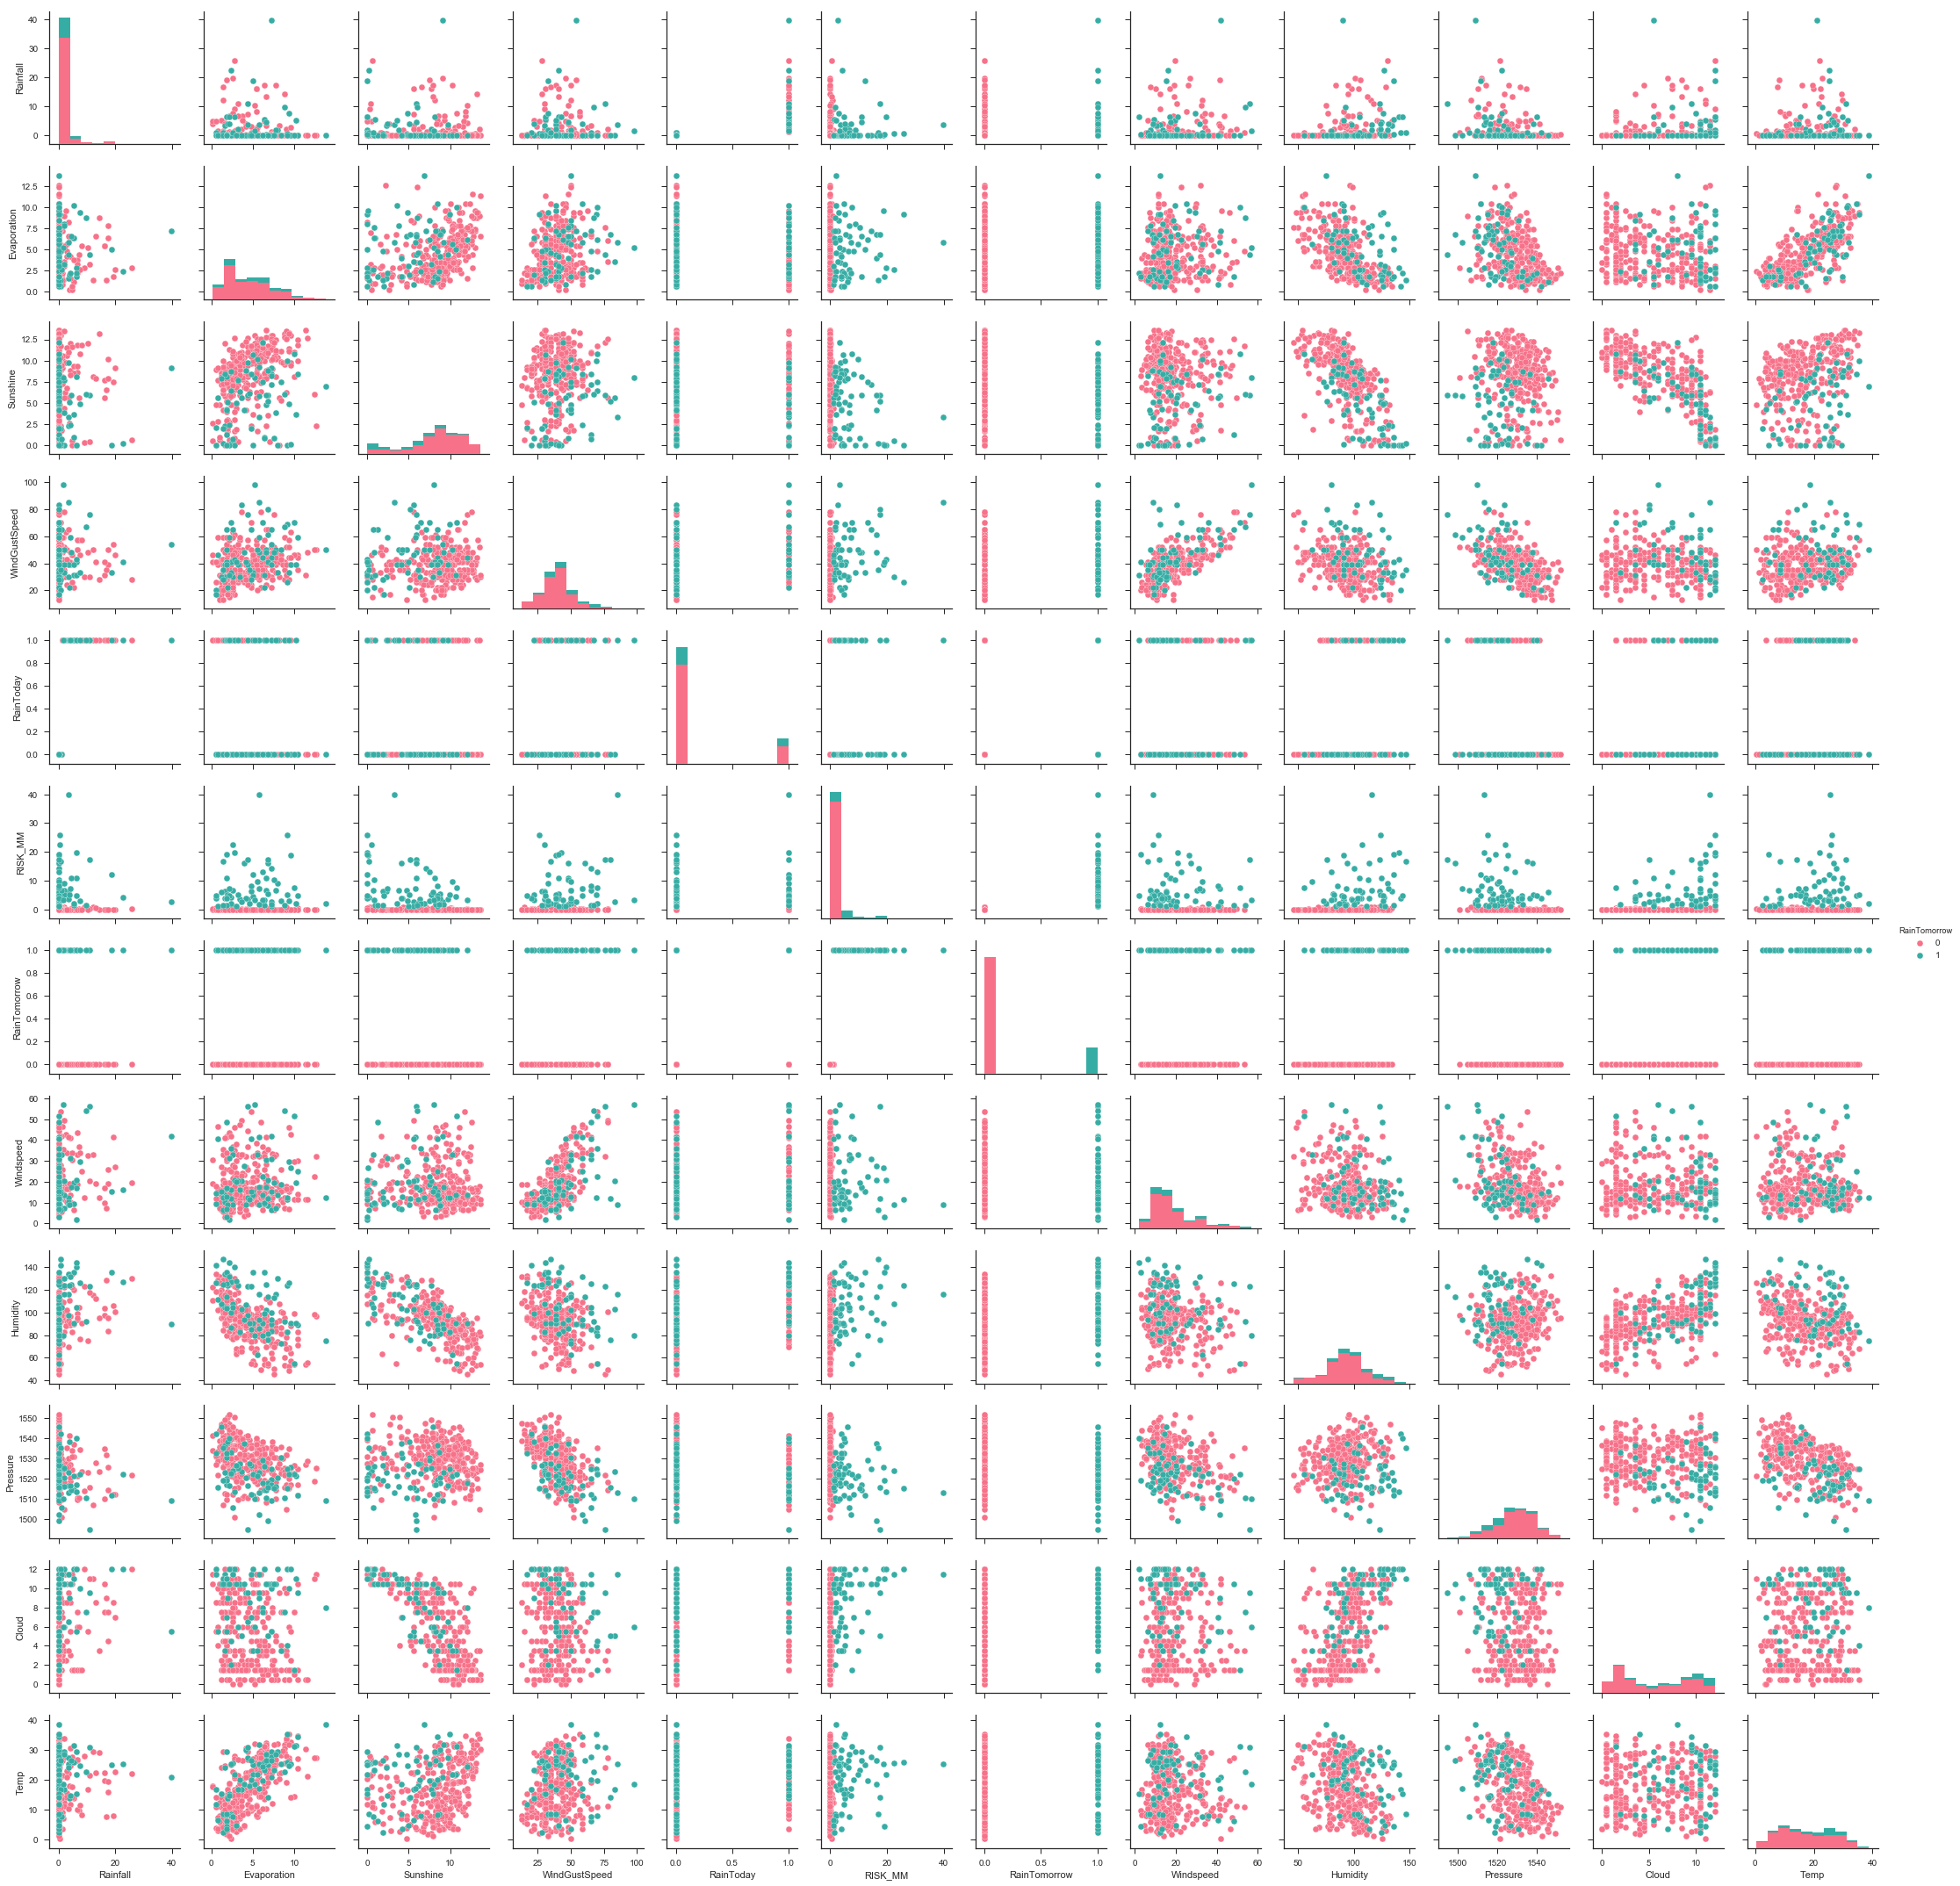

In [335]:
sns.pairplot(df,hue="RainTomorrow",palette="husl")

In [336]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [337]:
tf=TfidfVectorizer(analyzer='char',ngram_range=(2,2))
tf.fit(df['WindGustDir'])
df['WindGustDir']=tf.transform(df['WindGustDir']).toarray()

In [338]:
df['WindGustDir'].value_counts()

0.000000    336
0.767654     30
Name: WindGustDir, dtype: int64

In [339]:
tf=TfidfVectorizer(analyzer='char',ngram_range=(2,2))
tf.fit(df['WindDir3pm'])
df['WindDir3pm']=tf.transform(df['WindDir3pm']).toarray()

In [340]:
df['WindDir3pm'].value_counts()

0.000000    353
0.805005     13
Name: WindDir3pm, dtype: int64

In [341]:
df.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,RainToday,RISK_MM,RainTomorrow,Windspeed,Humidity,Pressure,Cloud,Temp
0,0.0,3.4,6.3,0.000000,30.0,0.0,0,3.6,1,16.0,82.5,1527.20,10.5,20.15
1,3.6,4.4,9.7,0.767654,39.0,0.0,1,3.6,1,12.5,98.0,1516.60,6.5,27.45
2,3.6,5.8,3.3,0.000000,85.0,0.0,1,39.8,1,9.0,116.5,1513.10,11.5,25.40
3,39.8,7.2,9.1,0.000000,54.0,0.0,1,2.8,1,42.0,90.0,1509.00,5.5,21.05
4,2.8,5.6,10.6,0.000000,50.0,0.0,1,0.0,0,34.0,92.5,1527.55,10.5,15.65


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         366 non-null float64
WindGustDir      366 non-null float64
WindGustSpeed    366 non-null float64
WindDir3pm       366 non-null float64
RainToday        366 non-null category
RISK_MM          366 non-null float64
RainTomorrow     366 non-null category
Windspeed        366 non-null float64
Humidity         366 non-null float64
Pressure         366 non-null float64
Cloud            366 non-null float64
Temp             366 non-null float64
dtypes: category(2), float64(12)
memory usage: 35.3 KB


# Modeling

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [344]:
x=df.drop(['RainTomorrow'],1)
y=df['RainTomorrow']

In [345]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y)

In [346]:
leg=LogisticRegression(C=0.0001)
leg.fit(x_train,y_train)
leg.score(x_test,y_test)

0.8260869565217391

In [347]:
svm=SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.8152173913043478

In [348]:
dt=DecisionTreeClassifier(max_depth=2,min_samples_leaf=0.24)
dt.fit(x_train,y_train)
y_dt=dt.predict(x_test)
dt.score(x_test,y_test)

0.9130434782608695

In [349]:
knn=KNeighborsClassifier(n_neighbors=6,weights='distance')
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
knn.score(x_test,y_test)

0.8804347826086957

# Ensemble methods

In [350]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [351]:
bag=BaggingClassifier(dt,n_estimators=400)
bag.fit(x_train,y_train)
bag.score(x_test,y_test)

0.8152173913043478

In [352]:
ada=AdaBoostClassifier(dt,n_estimators=400)
ada.fit(x_train,y_train)
ada.score(x_test,y_test)

0.9021739130434783

# CatBoost

In [353]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=10, depth=1, learning_rate=0.1, loss_function='Logloss',
                         eval_metric='Accuracy')
model.fit(x_train,y_train)
y_cat=model.predict(x_test)
model.feature_importances_

0:	learn: 0.9379562	total: 39.9ms	remaining: 359ms
1:	learn: 0.9890511	total: 68ms	remaining: 272ms
2:	learn: 0.9890511	total: 93.4ms	remaining: 218ms
3:	learn: 1.0000000	total: 114ms	remaining: 172ms
4:	learn: 1.0000000	total: 138ms	remaining: 138ms
5:	learn: 1.0000000	total: 159ms	remaining: 106ms
6:	learn: 1.0000000	total: 190ms	remaining: 81.2ms
7:	learn: 1.0000000	total: 219ms	remaining: 54.8ms
8:	learn: 1.0000000	total: 247ms	remaining: 27.4ms
9:	learn: 1.0000000	total: 277ms	remaining: 0us


array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,
         0.,   0.])

In [354]:
a=confusion_matrix(y_knn,y_test)
a

array([[73,  9],
       [ 2,  8]], dtype=int64)

Text(0.5,1,u'General Trend for Predicted Values')

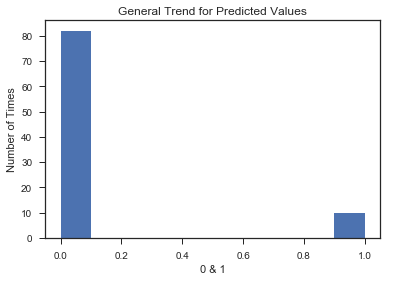

In [355]:
plt.hist(y_knn)
plt.xlabel('0 & 1')
plt.ylabel('Number of Times')
plt.title('General Trend for Predicted Values')

Text(0.5,1,u'General Trend for real Values')

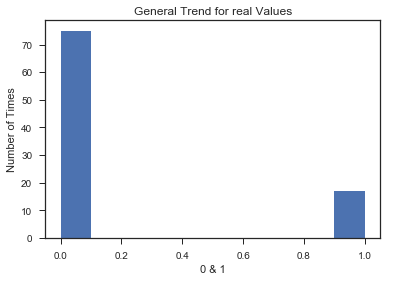

In [356]:
plt.hist(y_test)
plt.xlabel('0 & 1')
plt.ylabel('Number of Times')
plt.title('General Trend for real Values')

Text(0.5,37,u'0 = No Rain , 1 = Rain')

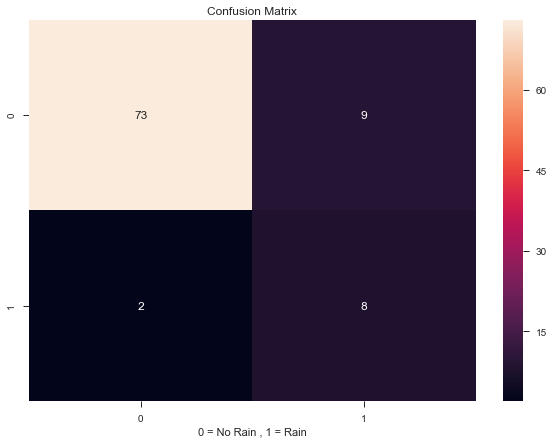

In [357]:
plt.figure(figsize = (10,7))
sns.heatmap(a,annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('0 = No Rain , 1 = Rain')

In [358]:
x.columns

Index([u'Rainfall', u'Evaporation', u'Sunshine', u'WindGustDir',
       u'WindGustSpeed', u'WindDir3pm', u'RainToday', u'RISK_MM', u'Windspeed',
       u'Humidity', u'Pressure', u'Cloud', u'Temp'],
      dtype='object')

In [359]:
df.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,RainToday,RISK_MM,RainTomorrow,Windspeed,Humidity,Pressure,Cloud,Temp
0,0.0,3.4,6.3,0.000000,30.0,0.0,0,3.6,1,16.0,82.5,1527.20,10.5,20.15
1,3.6,4.4,9.7,0.767654,39.0,0.0,1,3.6,1,12.5,98.0,1516.60,6.5,27.45
2,3.6,5.8,3.3,0.000000,85.0,0.0,1,39.8,1,9.0,116.5,1513.10,11.5,25.40
3,39.8,7.2,9.1,0.000000,54.0,0.0,1,2.8,1,42.0,90.0,1509.00,5.5,21.05
4,2.8,5.6,10.6,0.000000,50.0,0.0,1,0.0,0,34.0,92.5,1527.55,10.5,15.65


# Predicting Values

In [360]:
knn.predict([[23,.6,30,0.0,5,0.0,1,1,1.5,6,527,10.5,15]])

array([0], dtype=int64)